<a href="https://colab.research.google.com/github/xiaobo-fu/python_for_finance/blob/master/financial_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/content/gdrive/My Drive/G/ML/python_for_finance/source/"
CHAPTER_ID = "python_for_finance"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if not os.path.isdir(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [0]:
f = open("/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv", 'r')

In [0]:
data = pd.read_csv("/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv",
    index_col=0,
    parse_dates=True)

In [5]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


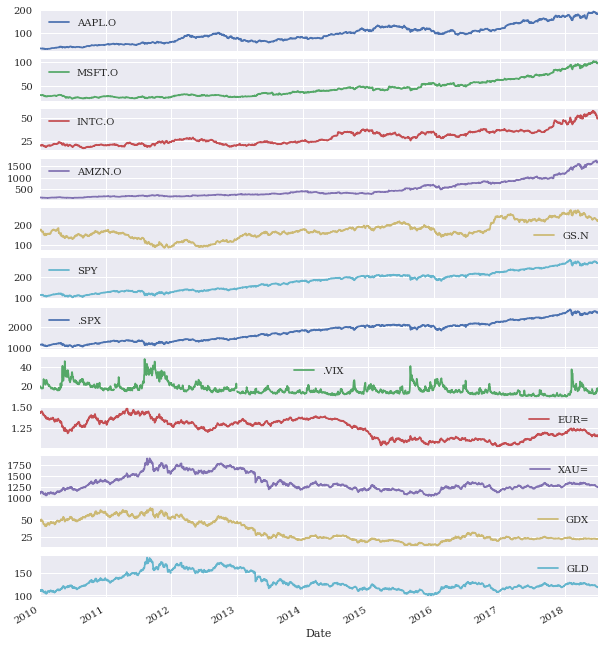

In [6]:
data.plot(figsize=(10, 12), subplots=True);

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


In [8]:
data.describe()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2216.000000,2211.000000,2138.000000,2138.00000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
25%,60.294225,28.566875,22.510000,213.595000,146.607500,133.987500,1338.567500,13.072500,1.131500,1221.525000,22.142500,117.40250
50%,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500
75%,117.235000,54.372500,34.710000,698.850000,192.132500,210.987500,2108.942500,19.067500,1.345400,1428.240000,48.342500,139.00250
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000


In [9]:
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [10]:
data.aggregate([min,
    np.mean,
    np.std,
    np.median,
    max]
).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [11]:
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


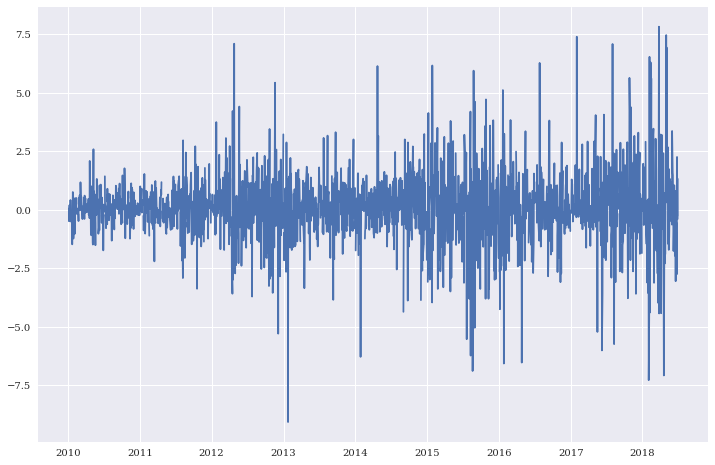

In [12]:
plt.figure(figsize = (12,8))
plt.plot(data['AAPL.O'].diff())

In [13]:
data.pct_change().round(3).head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


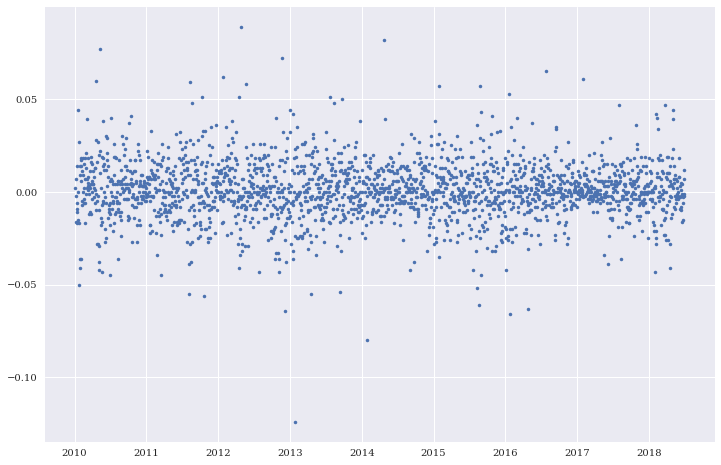

In [14]:
plt.figure(figsize = (12,8))
plt.plot(data['AAPL.O'].pct_change().round(3),'.')

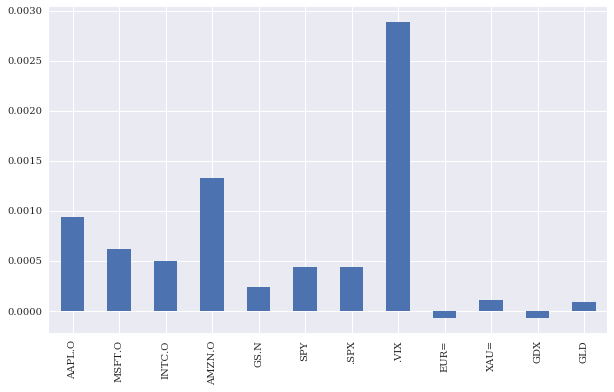

In [15]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

In [0]:
rets = np.log(data / data.shift(1))

In [17]:
rets.head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


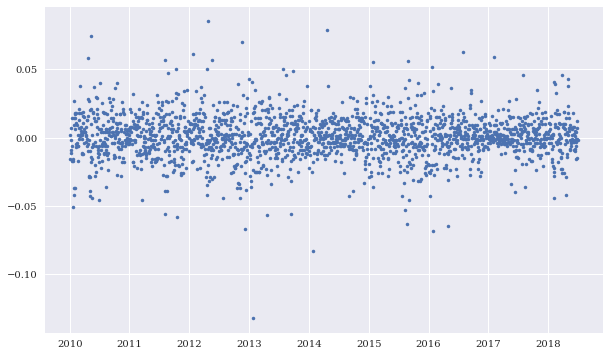

In [18]:
plt.figure(figsize = (10,6))
plt.plot(rets['AAPL.O'].round(3), '.')

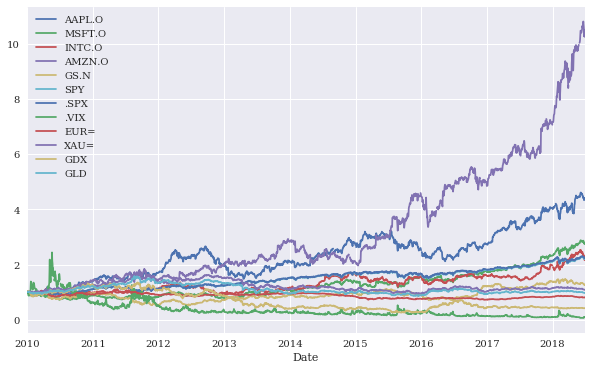

In [19]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));

In [20]:
data.resample('1w', label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


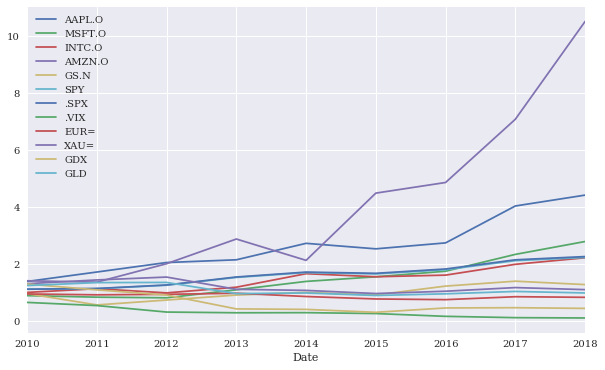

In [21]:
rets.cumsum().apply(np.exp). resample('1y', label='right').last(
).plot(figsize=(10, 6));

In [0]:
sym = 'AAPL.O'

In [0]:
data = pd.DataFrame(data[sym]).dropna()

In [0]:
window = 7
data['min'] = data[sym].rolling(window=window).min()
data['mean'] = data[sym].rolling(window=window).mean()
data['std'] = data[sym].rolling(window=window).std()
data['median'] = data[sym].rolling(window=window).median()
data['max'] = data[sym].rolling(window=window).max()
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()

In [25]:
data.tail()

,AAPL.O,min,mean,std,median,max,ewma
Date,,,,,,,
2018-06-25,182.17,182.17,186.045714,2.310540,185.69,188.84,182.907462
2018-06-26,184.43,182.17,185.415714,2.002322,185.46,188.74,184.049366
2018-06-27,184.16,182.17,184.761429,1.389549,184.92,186.50,184.132341
2018-06-28,185.50,182.17,184.734286,1.370108,184.92,186.50,185.158085
2018-06-29,185.11,182.17,184.535714,1.155463,184.92,185.50,185.122021


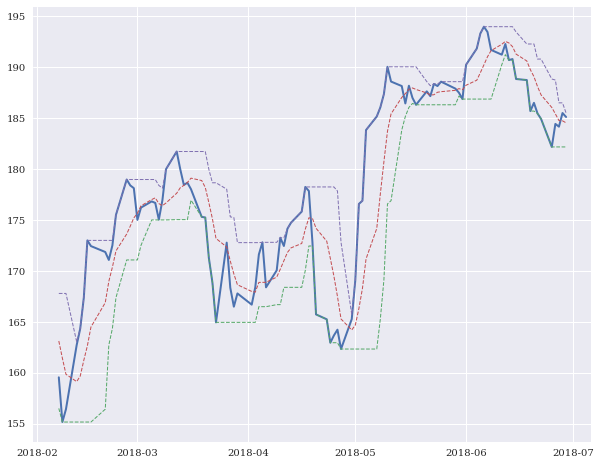

In [26]:
plt.figure(figsize =(10,8))
plt.plot(data['AAPL.O'].iloc[-100:], '-', lw = 2.0)
plt.plot(data[['min','mean','max']].iloc[-100:], '--', lw = 1)

In [0]:
data['SMA1'] = data[sym].rolling(window=42).mean()
data['SMA2'] = data[sym].rolling(window=252).mean()

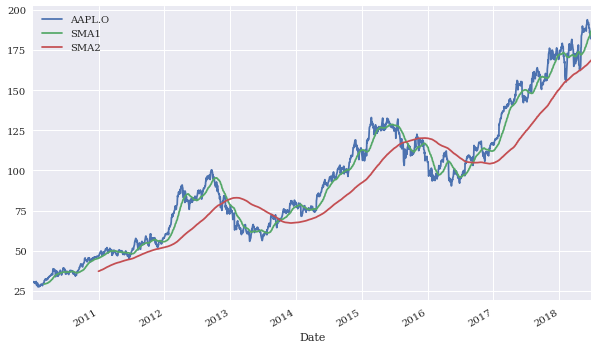

In [28]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

In [0]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],1,-1)

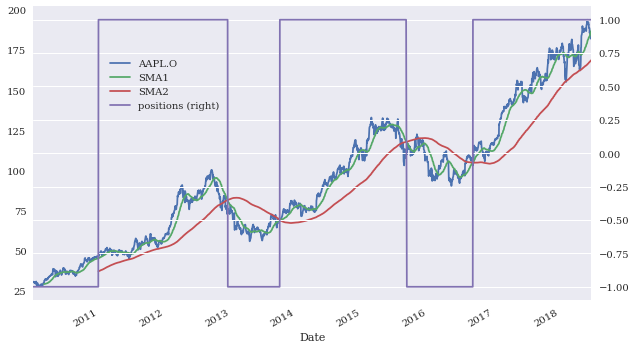

In [30]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.35, 0.85));

In [0]:
raw = pd.read_csv("/content/gdrive/My Drive/G/ML/python_for_finance/source/tr_eikon_eod_data.csv",
    index_col=0,
    parse_dates=True)

In [0]:
data = raw[['.SPX', '.VIX']].dropna()

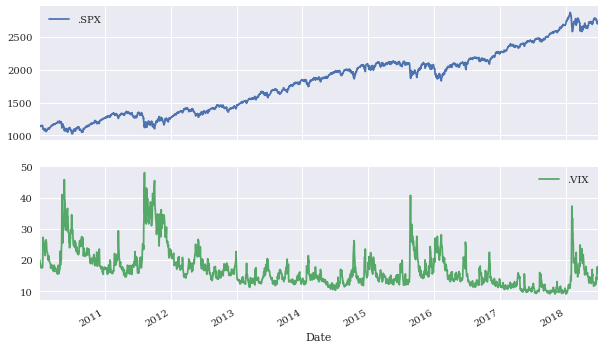

In [33]:
data.plot(subplots=True, figsize=(10, 6));

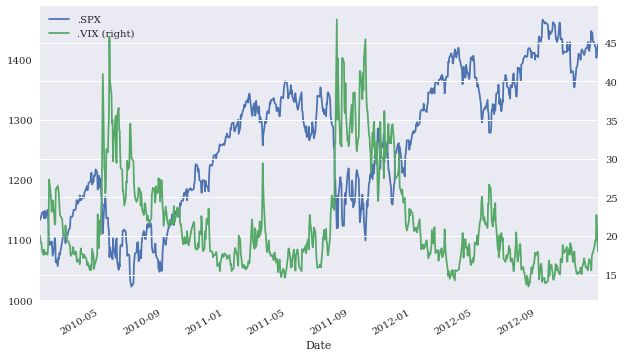

In [34]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));

In [0]:
rets = np.log(data / data.shift(1))

In [0]:
rets.dropna(inplace=True)

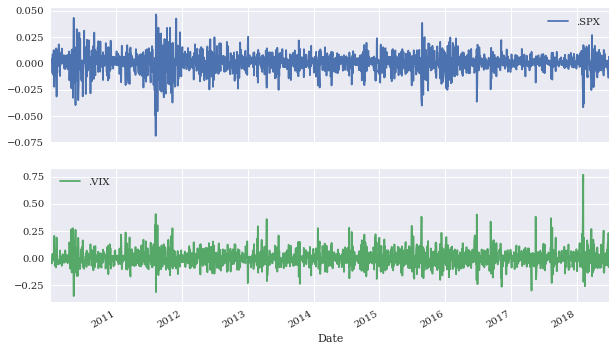

In [37]:
rets.plot(subplots=True, figsize=(10, 6));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e828e3748>,
      dtype=object)

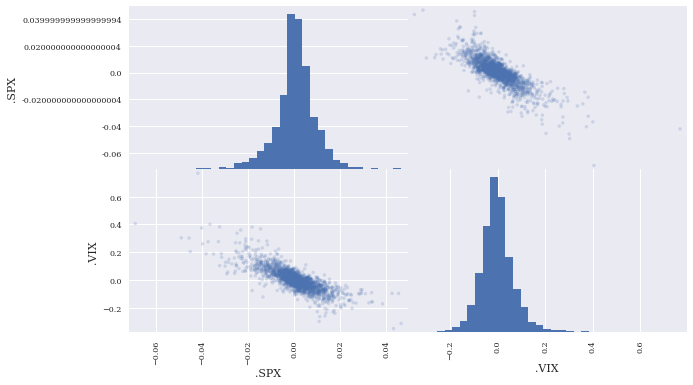

In [38]:
pd.plotting.scatter_matrix(rets,
    alpha=0.2,
    diagonal='hist',
    hist_kwds={'bins': 35},
    figsize=(10, 6))

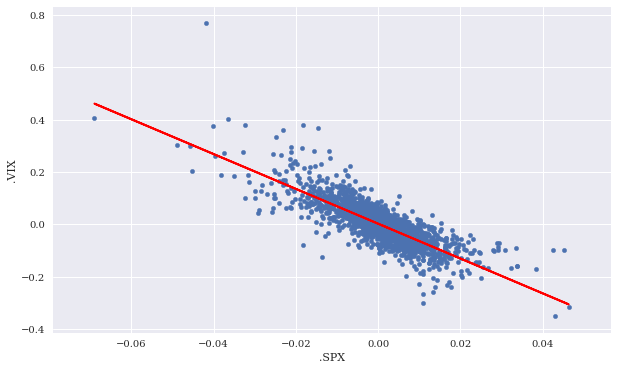

In [39]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);

In [40]:
rets.corr()

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


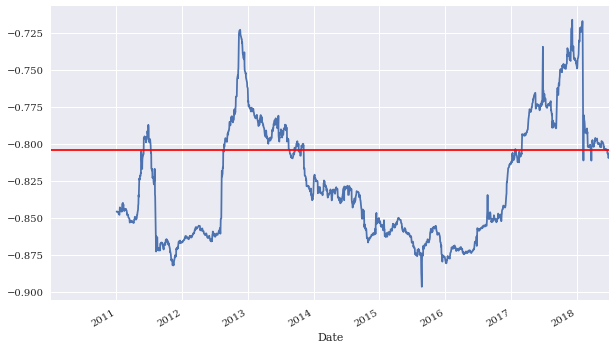

In [41]:
ax = rets['.SPX'].rolling(window=252).corr(
rets['.VIX']).plot(figsize=(10, 6))
ax.axhline(rets.corr().iloc[0, 1], c='r');

In [42]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('/content/gdrive/My Drive/G/ML/python_for_finance/source/fxcm_eur_usd_tick_data.csv',
    index_col=0, parse_dates=True)

CPU times: user 747 ms, sys: 128 ms, total: 875 ms
Wall time: 1.51 s


In [43]:
tick.head()

,Bid,Ask
2018-06-29 00:00:00.082,1.15635,1.15636
2018-06-29 00:00:00.106,1.15634,1.15636
2018-06-29 00:00:00.114,1.15634,1.15635
2018-06-29 00:00:00.121,1.15634,1.15634
2018-06-29 00:00:00.151,1.15632,1.15634


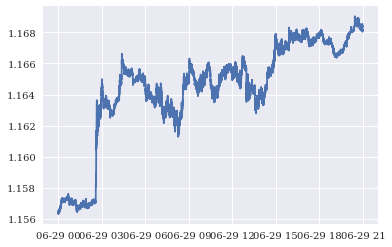

In [44]:
plt.plot(tick['Bid'])

In [0]:
tick_resm = tick.resample(rule='1Min').last()

In [46]:
tick_resm.head()

,Bid,Ask
2018-06-29 00:00:00,1.15640,1.15642
2018-06-29 00:01:00,1.15647,1.15648
2018-06-29 00:02:00,1.15654,1.15656
2018-06-29 00:03:00,1.15655,1.15657
2018-06-29 00:04:00,1.15649,1.15651


In [0]:
a = pd.Timestamp(2018, 6, 29, 0,1)

In [48]:
a

Timestamp('2018-06-29 00:01:00')

In [49]:
tick.iloc[161]

Bid    1.15639
Ask    1.15641
Name: 2018-06-29 00:01:02.922000, dtype: float64

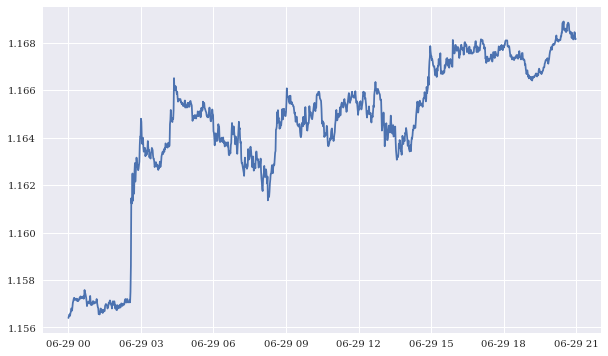

In [50]:
plt.figure(figsize = (10,6))
plt.plot(tick_resm['Bid'])